In [1]:
import pandas as pd
import matplotlib as mp
contents = pd.read_csv("train_data_final.csv")


In [2]:
payment_variables = []
spending_variables = []
delinquency_variables = []
balance_variables = []
risk_variables = []
for column in contents.columns:
    if 'ID' in column:
        break
    if 'P' in column:
        payment_variables.append(column)
    if 'S' in column:
        spending_variables.append(column)
    if 'D' in column:
        delinquency_variables.append(column)
    if 'B' in column:
        balance_variables.append(column)
    if 'R' in column:
        risk_variables.append(column)

print(delinquency_variables)

[]


In [3]:
pd.set_option('display.max_rows',None)
contents.drop('customer_ID',axis=1,inplace=True)
contents.info(max_cols=195,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 191 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    Unnamed: 0  276572 non-null  int64  
 1    S_2         276572 non-null  object 
 2    P_2         274277 non-null  float64
 3    D_39        276572 non-null  float64
 4    B_1         276572 non-null  float64
 5    B_2         276476 non-null  float64
 6    R_1         276572 non-null  float64
 7    S_3         225400 non-null  float64
 8    D_41        276476 non-null  float64
 9    B_3         276476 non-null  float64
 10   D_42        39357 non-null   float64
 11   D_43        193452 non-null  float64
 12   D_44        262857 non-null  float64
 13   B_4         276572 non-null  float64
 14   D_45        276476 non-null  float64
 15   B_5         276572 non-null  float64
 16   R_2         276572 non-null  float64
 17   D_46        215973 non-null  float64
 18   D_47        276572 non

In [4]:
contents.notna().sum()

Unnamed: 0    276572
S_2           276572
P_2           274277
D_39          276572
B_1           276572
B_2           276476
R_1           276572
S_3           225400
D_41          276476
B_3           276476
D_42           39357
D_43          193452
D_44          262857
B_4           276572
D_45          276476
B_5           276572
R_2           276572
D_46          215973
D_47          276572
D_48          240733
D_49           27226
B_6           276568
B_7           276572
B_8           275402
D_50          119378
D_51          276572
B_9           276572
R_3           276572
D_52          275080
P_3           261411
B_10          276572
D_53           72394
S_5           276572
B_11          276572
S_6           276572
D_54          276476
R_4           276572
S_7           225400
B_12          276572
S_8           276572
D_55          267353
D_56          126557
B_13          274054
R_5           276572
D_58          276572
S_9           129671
B_14          276572
D_59         

In [5]:
pd.set_option('display.max_rows',20)
contents[contents['P_2'].isna()]

,Unnamed: 0,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
411,4732228,2017-07-28,NaN,0.000996,0.002041,0.814279,0.009560,NaN,0.003586,0.008875,...,NaN,NaN,0.008308,0.001609,0.007423,NaN,0.003086,0.005993,0.009139,0
559,5434874,2018-01-20,NaN,0.001712,0.003781,0.810946,0.005817,NaN,0.008217,0.006753,...,NaN,NaN,0.000193,0.001974,0.003761,NaN,0.008485,0.001002,0.002589,0
581,4790069,2017-06-04,NaN,0.006803,0.331306,0.816098,0.000273,0.354266,0.007548,0.004502,...,NaN,NaN,NaN,0.002476,NaN,NaN,NaN,0.002598,NaN,0
744,1395044,2017-06-25,NaN,0.001750,0.130514,0.811767,0.001172,0.177758,0.001988,0.003734,...,NaN,NaN,NaN,0.000141,NaN,NaN,NaN,0.004857,NaN,1
773,3560937,2018-03-29,NaN,0.008568,0.002716,0.811562,0.509233,0.759026,0.006266,0.010770,...,0.00063,0.009936,0.004754,0.002458,0.000301,NaN,0.006386,0.008323,0.001319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275883,3967537,2017-04-11,NaN,0.003327,0.009667,0.817350,0.009800,NaN,0.004681,0.000689,...,NaN,NaN,0.004761,0.005119,0.008709,NaN,0.005945,0.003846,0.003581,0
275955,2571719,2017-06-13,NaN,0.008480,0.006125,0.814733,0.009708,NaN,0.000031,0.009133,...,NaN,NaN,0.009914,0.009757,0.000145,NaN,0.004263,0.000595,0.004488,0
276034,2498504,2017-07-30,NaN,0.005834,0.013901,0.817553,0.002634,0.174709,0.007127,0.004118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
276290,5394798,2017-05-27,NaN,0.009401,0.008935,0.819288,0.007140,NaN,0.001150,0.003381,...,NaN,NaN,0.006661,0.000037,0.002931,NaN,0.008985,0.006560,0.009539,0


In [6]:
contents['P_2'] = contents['P_2'].fillna(contents['P_2'].median())

In [7]:
contents['target'].value_counts()

0    207727
1     68845
Name: target, dtype: int64

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

payment_variables_target = payment_variables.copy()
payment_variables_target.append('target')

contents[payment_variables_target].corr()['target']

target    1.0
Name: target, dtype: float64

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

spending_variables_target = spending_variables.copy()
spending_variables_target.append('target')

contents[spending_variables_target].corr()['target']

target    1.0
Name: target, dtype: float64

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

delinquency_variables_target = delinquency_variables.copy()
delinquency_variables_target.append('target')

contents[delinquency_variables_target].corr()['target']

target    1.0
Name: target, dtype: float64

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

balance_variables_target = balance_variables.copy()
balance_variables_target.append('target')

contents[balance_variables_target].corr()['target']

target    1.0
Name: target, dtype: float64

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

risk_variables_target = risk_variables.copy()
risk_variables_target.append('target')

contents[risk_variables_target].corr()['target']

target    1.0
Name: target, dtype: float64

In [13]:
columna = 'S_' + '3'
contents[columna].min()

-0.4430886481493405

<AxesSubplot:xlabel='P_2', ylabel='target'>

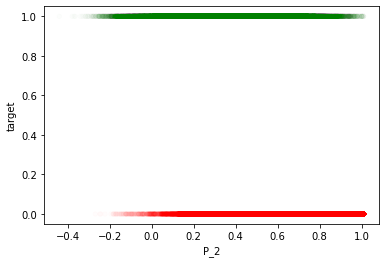

In [14]:
contents.plot.scatter(x='P_2',y='target',c=contents['target'].map({0:'r',1:'g'}),alpha=0.01)

In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
for v in payment_variables:
    ax = contents[v].plot(kind='box', title='boxplot')

    # Display the plot
    plt.show()

In [16]:
from sklearn.ensemble import IsolationForest

feature_analysis = contents.drop('S_2',axis=1).drop('D_63',axis=1).drop('D_64',axis=1)\
.drop('D_42',axis=1) \
.drop('D_49',axis=1) \
.drop('D_53',axis=1) \
.drop('D_66',axis=1) \
.drop('D_73',axis=1) \
.drop('D_76',axis=1) \
.drop('R_9',axis=1)  \
.drop('D_82',axis=1) \
.drop('B_29',axis=1) \
.drop('D_87',axis=1) \
.drop('D_88',axis=1) \
.drop('D_106',axis=1)\
.drop('R_26',axis=1) \
.drop('D_108',axis=1)\
.drop('D_110',axis=1)\
.drop('D_111',axis=1)\
.drop('B_39',axis=1) \
.drop('B_42',axis=1) \
.drop('D_132',axis=1)\
.drop('D_134',axis=1)\
.drop('D_135',axis=1)\
.drop('D_136',axis=1)\
.drop('D_137',axis=1)\
.drop('D_138',axis=1)\
.drop('D_142',axis=1)\

feature_analysis.fillna(0,inplace=True)

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=feature_analysis.columns.size, 
                          bootstrap=False, n_jobs=-1, random_state=1)


pred= iforest.fit_predict(feature_analysis)

In [17]:
feature_analysis['scores']=iforest.decision_function(feature_analysis)
feature_analysis['outlier_label']=pred

#Observaciones anómalas
feature_analysis[feature_analysis.outlier_label==-1]

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,scores,outlier_label
27,1281887,-0.082594,1.036996,0.123351,0.001927,1.005303,0.344413,0.372042,0.464230,0.046745,0.381039,1.044628,0.048233,0.002656,1.007346,-1.755879,0.359912,0.931009,0.000224,1.244764,1.001990,0.000000,0.003826,0.682497,0.006156,0.010657,0.067953,0.008880,0.010124,0.080618,0.002041,1.002276,1.001922,0.320550,0.012037,0.009167,0.939357,0.000000,0.010601,1.508972,1.255226,0.000000,0.029187,0.525709,0.007064,0.996870,0.008321,0.682217,0.074949,0.031548,1.003124,1.009357,0.002787,0.631340,0.774184,5.0,0.189680,10.177429,0.009894,0.007265,0.000988,0.500165,0.503892,0.015539,3.003959,0.601363,1.437760,0.001305,1.574968,1.534886,0.155245,0.305044,0.000000,0.054599,0.064752,1.501935,0.003744,0.001440,0.006239,0.601735,0.007769,0.004281,0.009949,4.003109,0.004476,0.121014,1.654009,0.104033,0.002226,84.459109,0.006394,10.007821,0.006313,1.0,0.002610,0.008311,0.006910,0.000429,1,0.008609,0.007859,0.008204,0.000693,17.008586,0.001406,0.005921,0.334069,0.007183,0.002062,0.006987,0.005337,0.009400,0.009794,1.003149,0.007444,0.001636,0.940720,0.390706,0.945291,0.046562,0.006721,0.942031,1.001770,1.008623,0.939735,0.334965,0.003351,0.117721,1.000841,5.0,0.007120,0.004146,1.258621,0.006499,0.802790,0.0,0.010686,0.0,1.0,0.012905,0.012506,0.0,0.735132,0.146698,0.007347,0.681920,1.008895,1.0,0.000771,0.005050,0.004603,0.006906,0.009415,0.000309,0.002224,0.000750,0.001714,0.003163,0.002862,0.007378,0.009312,0.003965,1,-0.107729,-1
28,2532336,0.377693,0.651189,0.587902,0.027158,0.504679,0.257067,0.002253,1.017181,0.065814,0.500152,0.391540,0.378985,0.035330,0.005000,0.710165,0.322677,0.667004,0.017281,0.379060,0.000198,0.100585,0.338179,0.655060,0.000855,0.117703,0.460866,0.030712,0.390625,0.632569,0.002255,1.005586,0.001255,0.201976,0.046411,0.123824,0.616594,0.000000,0.048405,0.008264,0.573015,0.000000,0.566759,0.235798,0.456854,0.513350,0.001634,0.443954,0.082112,0.005354,1.009479,1.003010,0.099899,0.835758,1.000192,5.0,0.188623,0.004677,0.006779,0.007931,0.000896,1.007395,0.005436,0.005896,0.006679,0.408371,0.395965,0.001005,0.290655,0.408139,0.003959,0.009463,0.071810,0.998740,0.006681,0.509337,0.003622,0.007860,0.003650,0.407366,1.002349,0.007903,0.001195,0.009107,0.003473,1.008762,0.583422,0.004349,0.004676,0.002680,0.000948,0.005043,0.009632,1.0,0.004844,0.009038,0.003366,0.009943,1,0.007678,0.002974,0.005435,0.004802,0.000724,0.000840,0.000319,0.008061,0.001381,0.006078,0.507517,0.007180,0.000874,0.005657,0.000332,0.005972,0.007025,0.953563,1.037290,0.958628,1.096593,0.008466,1.034528,1.007144,1.018898,1.047750,0.339483,0.003295,0.593349,1.003307,3.0,0.002366,1.008011,0.277633,0.003997,0.000069,1.0,0.150209,0.0,3.0,0.145165,0.144375,0.0,0.583628,0.579739,0.001372,0.280891,0.003475,1.0,0.008415,1.008856,1.001315,0.006049,1.007341,0.001717,0.002784,0.000809,0.008993,0.003351,0.001352,0.009040,0.005568,0.001457,1,-0.005361,-1
34,4490661,0.832462,0.003122,0.053585,0.048048,0.252569,0.327033,0.291467,0.122791,0.092092,0.000459,0.250686,0.734492,0.044994,0.000225,0.400749,0.527405,0.063178,0.187701,0.051325,0.004307,0.000000,0.333760,0.000401,0.007573,0.208248,0.716379,0.107206,0.280946,0.058667,0.009773,1.001

In [20]:
feature_analysis[feature_analysis.outlier_label==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262743 entries, 0 to 276571
Columns: 165 entries, Unnamed: 0 to outlier_label
dtypes: float64(161), int64(4)
memory usage: 332.8 MB
